In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(os.path.abspath(''),'..','scripts'))
sys.path.append(os.path.join(os.path.abspath(''),'..','src'))

from Experiment import *
from Analyzer import *
from Artist import *
artist = Artist()

# SatGreedy Study

In [3]:
# non-journal version lost
results = Analyzer("ba_satgreedy").df

AssertionError: 

Text(0.5, 0, 'k')

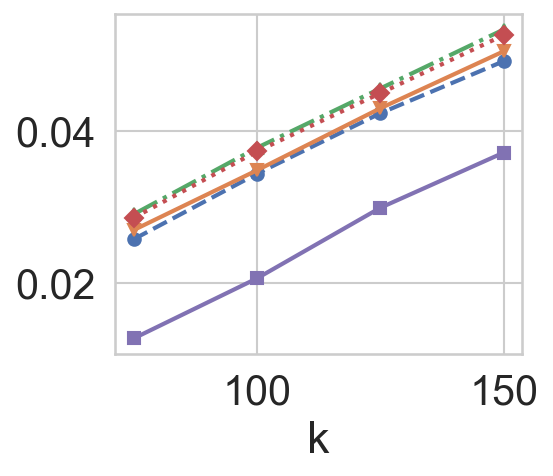

In [73]:
# update default number_of_blocked_nodes
default_number_of_blocked_nodes = 50
default_n = 5000

fig = plt.figure(figsize=(3.5, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
i = 0
results1 = results[results['number_of_blocked_nodes'] == default_number_of_blocked_nodes]
results1 = results1[results1['n'] == default_n]
for s in names:
    d = pd.DataFrame(results1[results1["solver"] == s])
    d = d.sort_values("seeds")
    if len(d) == 0:
        continue
    d['seeds'] = d['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
    d = d.sort_values("seeds")
    ax.plot(d['seeds'],(d['objective']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1], linewidth=2.0)
    i += 1
    
d = results1[~results1['solver'].isin(names)]
d = d.groupby('number_of_seeds', as_index=False)['objective'].min()
ax.plot(d['number_of_seeds'],np.array(d['objective'])/results1.iloc[0]['n'],label="IMM",linestyle=markers_and_lines[i][0],
        marker=markers_and_lines[i][1], linewidth=2.0)
    
# ax.set_yscale("log")
ax.set_xlabel("k")
# ax.set_ylabel(r'$\nu$')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1., 1.02, 0., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

## true one below
# ax.legend(bbox_to_anchor=(-.35, -0.4, 3, .102), loc='upper left',
#            ncol=5, mode="expand", borderaxespad=0.,frameon=True)

Text(0.5, 0, '$\\ell$')

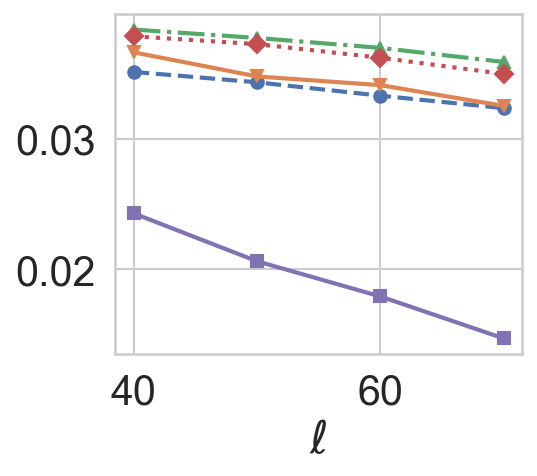

In [72]:
# update default number_of_blocked_nodes
default_number_of_seeds = 100
default_n = 5000

fig = plt.figure(figsize=(3.5, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
i = 0
results1 = results[results['n'] == default_n]
for s in names:
    d = pd.DataFrame(results1[results1["solver"] == s])
    d = d.sort_values("seeds")
    if len(d) == 0:
        continue
    d['seeds'] = d['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
    d = d[d['seeds'] == default_number_of_seeds]
    d = d.sort_values("number_of_blocked_nodes")
    ax.plot(d['number_of_blocked_nodes'],(d['objective']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1], linewidth=2.0)
    i += 1
    
d = results1[~results1['solver'].isin(names)]
d = d[d['number_of_seeds'] == default_number_of_seeds]
d = d.groupby('number_of_blocked_nodes', as_index=False)['objective'].min()
ax.plot(d['number_of_blocked_nodes'],np.array(d['objective'])/results1.iloc[0]['n'],label="IMM",linestyle=markers_and_lines[i][0],
        marker=markers_and_lines[i][1], linewidth=2.0)
    
# ax.set_yscale("log")
ax.set_xlabel(r'$\ell$')
# ax.set_ylabel(r'$\nu$')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1., 1.02, 0., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

## true one below
# ax.legend(bbox_to_anchor=(-.35, -0.4, 3, .102), loc='upper left',
#            ncol=5, mode="expand", borderaxespad=0.,frameon=True)

Text(0, 0.5, '$\\nu$')

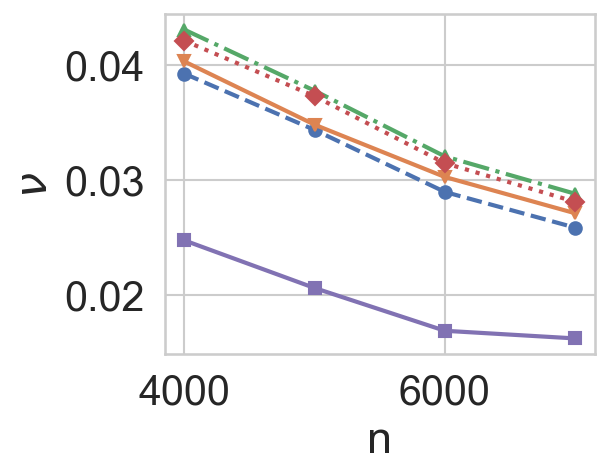

In [71]:
# update default number_of_blocked_nodes
default_number_of_seeds = 100
default_number_of_blocked_nodes = 50

fig = plt.figure(figsize=(3.7, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
i = 0
results1 = results[results['number_of_blocked_nodes'] == default_number_of_blocked_nodes]
for s in names:
    d = pd.DataFrame(results1[results1["solver"] == s])
    d = d.sort_values("seeds")
    if len(d) == 0:
        continue
    d['seeds'] = d['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
    d = d[d['seeds'] == default_number_of_seeds]
    d = d.sort_values("n")
    ax.plot(d['n'],(d['objective']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1], linewidth=2.0)
    i += 1
    
d = results1[~results1['solver'].isin(names)]
d = d[d['number_of_seeds'] == default_number_of_seeds]
d = d.groupby('n', as_index=False)['objective'].min()
ax.plot(d['n'],np.array(d['objective'])/d['n'],label="IMM",linestyle=markers_and_lines[i][0],
        marker=markers_and_lines[i][1], linewidth=2.0)
    
# ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel(r'$\nu$')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1., 1.02, 0., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

## true one below
# ax.legend(bbox_to_anchor=(-.35, -0.4, 3, .102), loc='upper left',
#            ncol=5, mode="expand", borderaxespad=0.,frameon=True)

## DIM version

In [ ]:
# lost
# analyst = Analyst("ba_satgreedy_baselines")
# results = analyst.df

In [4]:
analyst = Analyzer("ba_satgreedy_baselines_many_seeds")
results = analyst.df

AssertionError: 

Text(0, 0.5, 'Runtime [s]')

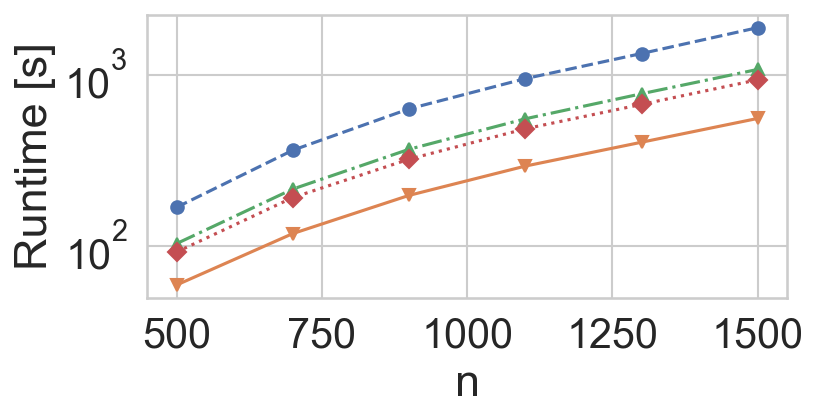

In [5]:
# fig, ax = artist.create_figure() -- web version

fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)

names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
i = 0
for s in results["solver"].unique():
    d = results[results["solver"] == s]
    ax.plot(d['n'],(d['time']+d['dim_time'])/10**9,label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1])
    i += 1
ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel("Runtime [s]")
# ax.legend(bbox_to_anchor=(-.35, -0.5, 3.3, .102), loc='upper left',
#            ncol=4, mode="expand", borderaxespad=0.,frameon=True)
# ax.legend()

Text(0, 0.5, 'SRIM / n')

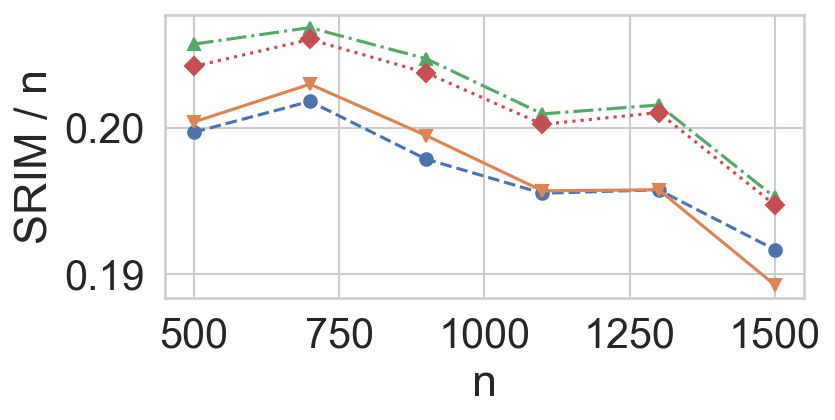

In [6]:
results['obj_sum'] = results['sequence'].apply(np.sum)

# fig, ax = artist.create_figure() -- web version

fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
ax = fig.add_subplot(1, 1, 1)

i = 0
for s in results["solver"].unique():
    d = results[results["solver"] == s]
    ax.plot(d['n'],(d['obj_sum']/d['n']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1])
    i += 1
ax.set_xlabel("n")
ax.set_ylabel("SRIM / n")

# Marginal Gain Study

In [2]:
# ACTIVATE MARGINAL GAIN BEFORE RUNNING THE SCRIPT THAT PRODUCES THIS RESULT!
# by setting -m flag for Imm solver in RobustWrapper script
results = Analyzer("ba_mm").df
# results = df[df['solver'] == 'NetShield']

In [3]:
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [4]:
df = results.copy()

Text(0.5, 0, '$\\ell$ [removed nodes]')

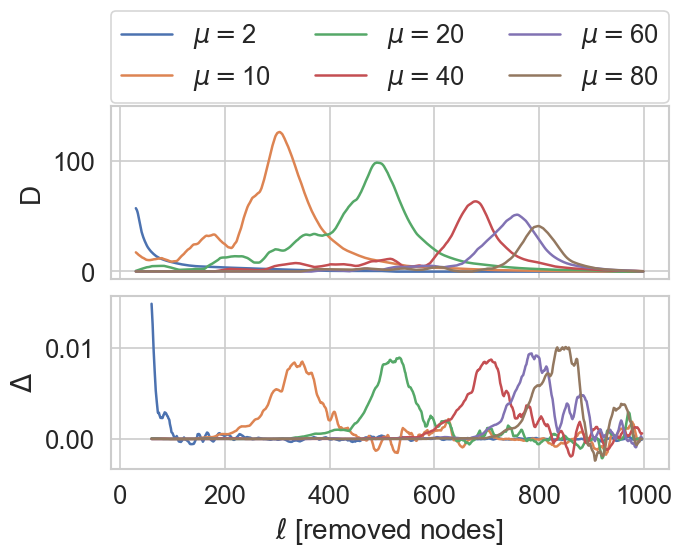

In [5]:
# this plots the difference of measures based on density parameter
sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
fig, axs = plt.subplots(2, 1, sharex=True, dpi=120, figsize=(6,4))
fig.subplots_adjust(hspace=0.1)

df = df.sort_values("mm")
df = df
for r in df['mm'].unique():
    d = df[df['mm'] == r]
    
    rni = d[d['mode'] == 0]
    emf = d[d['mode'] == 5]
    emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
    rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)

    a3 = emf_seq - rni_seq
    axs[0].plot(moving_average(a3,30), label="$\mu=$" + str(int(r)))
axs[0].set_ylim(top=150)
axs[0].set_ylabel("D")

df2 = df[df['marginal_gain'].notna()]
for r in df['mm'].unique():
    df3 = df2[df2['mm'] == r]
    gains = []
    for i in df3.index: # over solvers
        g = df.loc[i,'marginal_gain']
        gain = []
        for j in range(len(g)-1):
            gain.append(g[j][1]/g[j][0])
        gains.append(gain)
    gains = np.array(gains)
    acc_gain = np.amax(gains,axis=0)
    
    axs[1].plot(moving_average(np.diff(moving_average(acc_gain,10)),50), label="mm = {}".format(results.loc[i,'mm']))
    axs[1].set_ylabel("$\Delta$")
    
axs[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
axs[1].set_xlabel("$\ell$ [removed nodes]")

Text(0.5, 0, '$\\ell$ [removed nodes]')

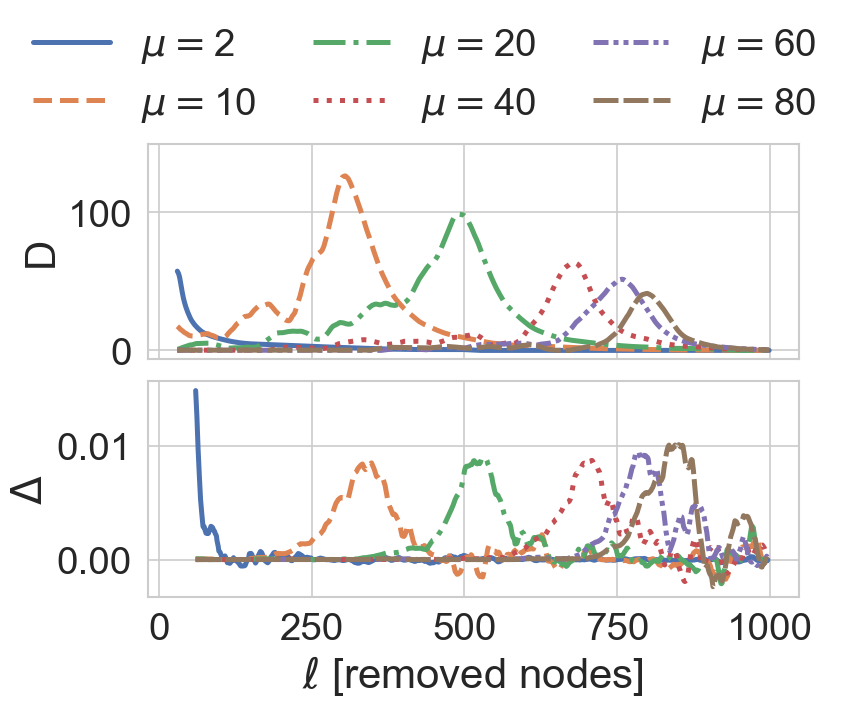

In [34]:
# journal style
sns.set(style="whitegrid", font_scale=2.1, rc={'axes.grid': True})
fig, axs = plt.subplots(2, 1, sharex=True, dpi=120, figsize=(7,5))
fig.subplots_adjust(hspace=0.1)
line_styles = ['-','--','-.',':',(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1))]

df = df.sort_values("mm")
df = df
i = 0
for r in df['mm'].unique():
    d = df[df['mm'] == r]
    
    rni = d[d['mode'] == 0]
    emf = d[d['mode'] == 5]
    emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
    rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)

    a3 = emf_seq - rni_seq
    axs[0].plot(moving_average(a3,30), linestyle=line_styles[i], label="$\mu=$" + str(int(r)), linewidth=3.0)
    i += 1
axs[0].set_ylim(top=150)
axs[0].set_ylabel("D")

df2 = df[df['marginal_gain'].notna()]
k = 0
for r in df['mm'].unique():
    df3 = df2[df2['mm'] == r]
    gains = []
    for i in df3.index: # over solvers
        g = df.loc[i,'marginal_gain']
        gain = []
        for j in range(len(g)-1):
            gain.append(g[j][1]/g[j][0])
        gains.append(gain)
    gains = np.array(gains)
    acc_gain = np.amax(gains,axis=0)
    
    axs[1].plot(moving_average(np.diff(moving_average(acc_gain,10)),50), linestyle=line_styles[k], label="mm = {}".format(results.loc[i,'mm']), linewidth=3.0)
    axs[1].set_ylabel("$\Delta$")
    k += 1
    
axs[0].legend(bbox_to_anchor=(-0.2, 1.02, 1.25, .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., frameon=False)
axs[1].set_xlabel("$\ell$ [removed nodes]")

In [41]:
# multiseed
df = Analyzer("ba_seeds").df
results = df

Text(0, 0.5, 'Number of active nodes')

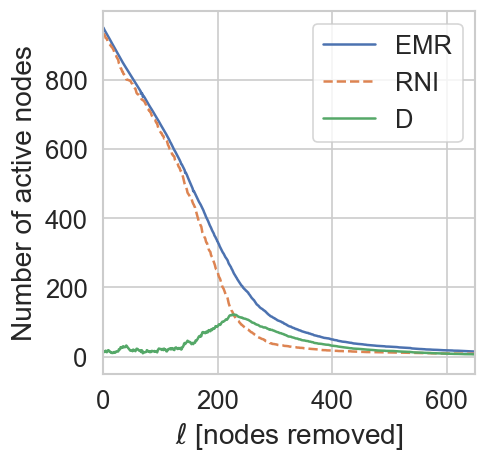

In [37]:
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
fig = plt.figure(figsize=(4,4), dpi=120)
ax = fig.add_subplot(1, 1, 1)

df = results
df = df[df['n']==1000]
emf = df[df['mode'] == 5]
emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
ax.plot(emf_seq, label="EMR", linestyle=artist.LINE_STYLES[0])


# others = df[df['solver_params'].isna()]
# j = 0
# for i in others.index:
#     ax.plot(np.array(df.loc[i,"sequence"])*df.iloc[0]['n'], label= "RIM".format(names[df.loc[i,"solver"]]))
#     j+=1
#     if j == 1:
#         break #two redundant results


rni = df[df['mode'] == 0]
rni = rni[rni['solution_path'].notna()]
rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)
ax.plot(np.array(rni_seq), label="RNI", linestyle=artist.LINE_STYLES[1])

plt.plot(emf_seq-rni_seq, label="D")
plt.xlim((0,650))
# plt.ylim((0,800))
ax.legend()
plt.xlabel("$\ell$ [nodes removed]")
plt.ylabel("Number of active nodes")

Text(0, 0.5, 'Number of active nodes')

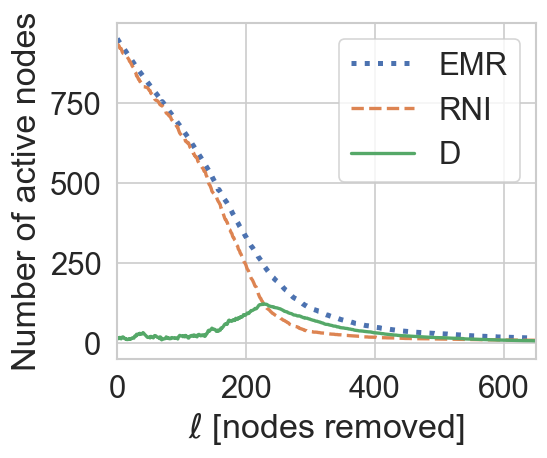

In [48]:
# journal style
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
sns.set(style="whitegrid", font_scale=1.7, rc={'axes.grid': True})
fig = plt.figure(figsize=(4.5,3.7), dpi=120)
ax = fig.add_subplot(1, 1, 1)

df = results
df = df[df['n']==1000]
emf = df[df['mode'] == 5]
emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
ax.plot(emf_seq, label="EMR", linestyle=artist.LINE_STYLES[3], linewidth=3.0)


# others = df[df['solver_params'].isna()]
# j = 0
# for i in others.index:
#     ax.plot(np.array(df.loc[i,"sequence"])*df.iloc[0]['n'], label= "RIM".format(names[df.loc[i,"solver"]]))
#     j+=1
#     if j == 1:
#         break #two redundant results


rni = df[df['mode'] == 0]
rni = rni[rni['solution_path'].notna()]
rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)
ax.plot(np.array(rni_seq), label="RNI", linestyle=artist.LINE_STYLES[1], linewidth=2.0)

plt.plot(emf_seq-rni_seq, label="D", linestyle=artist.LINE_STYLES[0], linewidth=2.0)
plt.xlim((0,650))
# plt.ylim((0,800))
ax.legend()
plt.xlabel("$\ell$ [nodes removed]")
plt.ylabel("Number of active nodes")

In [29]:
df = Analyzer("ba_mm_twist").df # result of the scripts "ba_mm_twist", not a dag
# the script was updated after the conference submission

In [30]:
for i in df.index:
    if not pd.isnull(df.loc[i,'imm']):
        df.loc[i,'rob'] = df.loc[i,'imm']['objective']
    else:
        df.loc[i,'rob'] = df.loc[i,'sequence'][0]

In [31]:
results = df
rseq = []
for r in sorted(results['delta'].unique()):
    d = results[results['delta'] == r]
    a1 = None
    a2 = None
    m = 0
    for i in d.index:
        dd = d.loc[i]
        if np.isnan(dd['mode']):
#             # mode == IM
# #             plt.plot(dd['sequence'], label='DIM')
            a1 = dd['rob']
        else:
            a2 = dd['rob']
            m = int(dd['m'])
            # mode = EMT, trees
#             plt.plot(dd['sequence'], label='EMT')
    if a1 == None or a2 == None:
        continue
    a3 = (a2-a1)
    rseq.append((a3,r,m))
rseq = np.array(rseq)

Text(0, 0.5, 'm')

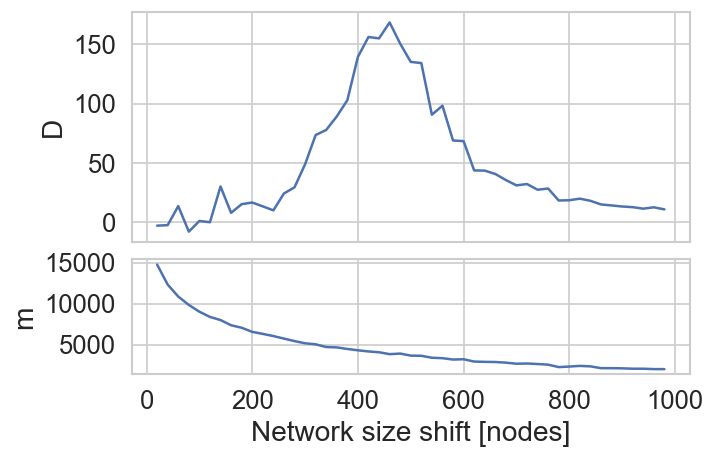

In [32]:
sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
fig, axs = plt.subplots(2, 1, sharex=True, dpi=120, gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0.1)

axs[1].plot(rseq[:,1], rseq[:,2])
axs[0].plot(rseq[:,1], rseq[:,0])
axs[1].set_xlabel("Network size shift [nodes]")
axs[0].set_ylabel("D")
axs[1].set_ylabel("m")

Text(0, 0.5, 'm')

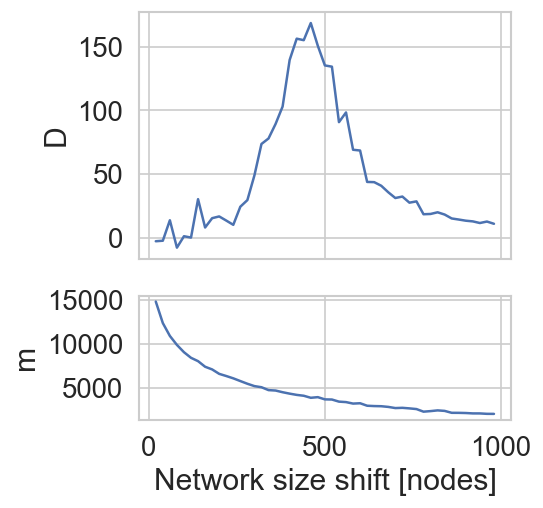

In [39]:
# journal version
sns.set(style="whitegrid", font_scale=1.5, rc={'axes.grid': True})
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(4,4.5), dpi=120, gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0.2)

axs[1].plot(rseq[:,1], rseq[:,2])
axs[0].plot(rseq[:,1], rseq[:,0])
axs[1].set_xlabel("Network size shift [nodes]")
axs[0].set_ylabel("D")
axs[1].set_ylabel("m")

# Scalability

In [6]:
result = Analyzer('ba_alpha').df

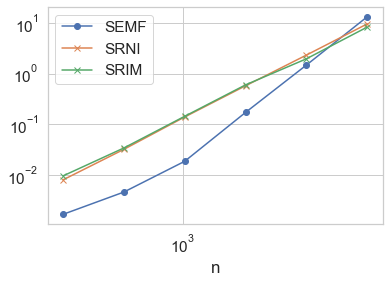

In [7]:
df = result.copy()
plt.xscale("log")
plt.yscale("log")
df = df[df['n'] < 10**4]
df['runtime'] = df['runtime']/(60*60*10**9)
df['time'] = df['time']/(60*60*10**9)
df['dim_time'] = df['dim_time']/(60*60*10**9)
df['time'] += df['dim_time']
df[df['mode']==5].groupby("n").sum()["runtime"].plot(marker="o", label="SEMF")
df[df['mode']==0].groupby("n").sum()["runtime"].plot(marker="x", label="SRNI")
df[df['mode'].isna()].groupby("n").sum()["dim_time"].plot(marker="x", label="SRIM")
plt.legend()

In [120]:
result = Analyzer('ba_alpha_2').df #sparse
result2 = Analyzer('ba_alpha_2_bigger').df #sparse
result = pd.concat([result, result2],sort=True)

Text(0, 0.5, 'Runtime [s]')

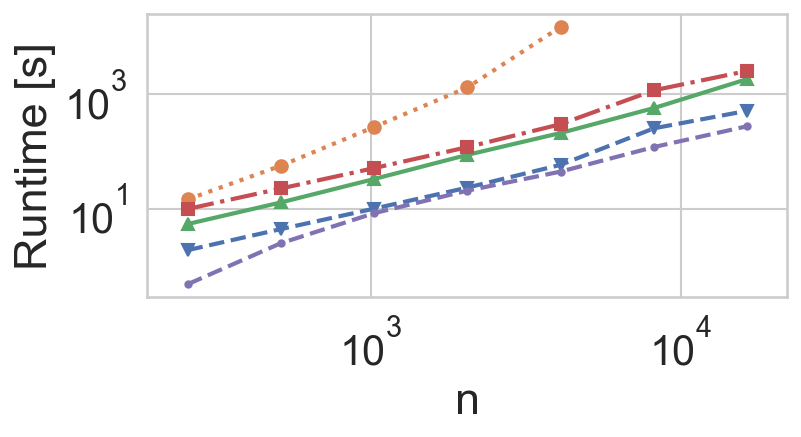

In [123]:
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
df = result.copy()
plt.xscale("log")
plt.yscale("log")
df['runtime'] = df['runtime']/(10**9)
df['time'] = df['time']/(10**9)
df['dim_time'] = df['dim_time']/(10**9)
df['time'] += df['dim_time']
df[df['mode']==5].groupby("n").sum()["runtime"].plot(marker="v", linestyle="--", label="SEMF (S-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==6].groupby("n").sum()["runtime"].plot(marker="o", linestyle=":", label="SEMF (BIT-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==0].groupby("n").sum()["runtime"].plot(marker="^", linestyle="-", label="SRNI", ax=ax, linewidth=2.0)
df[df['mode'].isna()].groupby("n").sum()["time"].plot(marker="s", linestyle="-.", label="SRIM", ax=ax, linewidth=2.0)


df[df['mode']==5].groupby("n").sum()["Total imm time"].plot(marker=".", linestyle="--", label="Immunization", ax=ax, linewidth=2.0)

plt.xlim((1.9*10**2, 10**4*2.2))
plt.ylabel("Runtime [s]")
# legend for grp

In [127]:
result = Analyzer('ba_alpha_3').df #dense

(100, 8000)

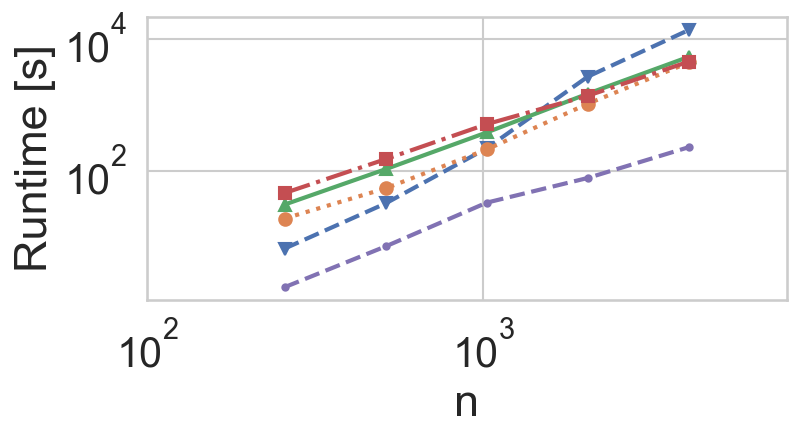

In [129]:
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
ax = fig.add_subplot(1, 1, 1)
df = result.copy()
plt.xscale("log")
plt.yscale("log")
df['runtime'] = df['runtime']/(10**9)
df['time'] = df['time']/(10**9)
df['dim_time'] = df['dim_time']/(10**9)
df['time'] += df['dim_time']
df[df['mode']==5].groupby("n").sum()["runtime"].plot(marker="v", linestyle="--", label="SEMF (S-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==6].groupby("n").sum()["runtime"].plot(marker="o", linestyle=":", label="SEMF (BIT-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==0].groupby("n").sum()["runtime"].plot(marker="^", linestyle="-", label="SRNI", ax=ax, linewidth=2.0)
df[df['mode'].isna()].groupby("n").sum()["time"].plot(marker="s", linestyle="-.", label="SRIM", ax=ax, linewidth=2.0)

df[df['mode']==5].groupby("n").sum()["Total imm time"].plot(marker=".", linestyle="--", label="Immunization", ax=ax, linewidth=2.0)

a = df[['Total imm time','runtime','n']].groupby('n').sum().copy()
a['r'] = a['Total imm time']/(a['runtime']/10**9)

plt.ylabel("Runtime [s]")
plt.xlim((100, 10**3*8))
# plt.legend()